In [296]:
%load_ext autoreload
%autoreload 
import numpy as np
import laserhockey.hockey_env as h_env
import gym
import torch
import time
from pathlib import Path

env_list = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cuda


In [297]:
def clear_envs():
    for env in env_list:
        env.close()


def add_env(env):
    env_list.append(env)


# env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)
# add_env(env)

# obs = env.reset()
# obs_agent2 = env.obs_agent_two()
# _ = env.render()

# In[4]:


# player1 = h_env.BasicOpponent(weak=False)
# player2 = h_env.HumanOpponent(env=env, player=1)
# clear_envs()

# In[5]:


# How to step & get obs
# obs, r, d, info = env.step(np.hstack([a1,a2]))
# obs_agent2 = env.obs_agent_two()


import DDPG.DDPG as DDPG

#env_name = 'Pendulum-v0'
#env = gym.make(env_name)
env = h_env.HockeyEnv(mode=0)
env_name = 'HockeyEnv'
#ac_space = env.action_space
#o_space = env.observation_space

o_space = env.observation_space
ac_space = env.action_space
print(ac_space)
print(o_space)
print(list(zip(env.observation_space.low, env.observation_space.high)))

use_target = True
ddpg = DDPG.DDPG(o_space.shape[0], ac_space.shape[0])
print("DDPG with state dim: {} and action dim {}".format(o_space.shape[0], ac_space.shape[0]))
print(ac_space.shape[0]//2)
import matplotlib.pyplot as plt

Box(-1.0, 1.0, (8,), float32)
Box(-inf, inf, (18,), float32)
[(-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf), (-inf, inf)]
DDPG with state dim: 18 and action dim 8
4


In [298]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [299]:
def subplot(fig, R, S, P, Q):
    r = list(zip(*R))
    s = list(zip(*S))
    p = list(zip(*P))
    q = list(zip(*Q))
    if fig != None:
        plt.close(fig)
    # clear_output(wait=True)

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

    ax[0, 0].plot(list(r[1]), list(r[0]), 'r')  # row=0, col=0
    ax[0, 1].plot(list(s[1]), list(s[0]), 'k')  # row=0, col=1

    ax[1, 0].plot(list(p[1]), list(p[0]), 'b')  # row=1, col=0
    ax[1, 1].plot(list(q[1]), list(q[0]), 'g')  # row=1, col=1
    ax[0, 0].title.set_text('Reward')
    ax[0, 1].title.set_text('Smoothed Reward')
    ax[1, 0].title.set_text('Policy loss')
    ax[1, 1].title.set_text('Q loss')
    plt.pause(0.02)
    return fig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
25: Done after 251 steps. Episode reward: 0 
 Value-loss 0.9840603470802307, policy-loss 0.027063939720392227
Best reward 0 at episode 1


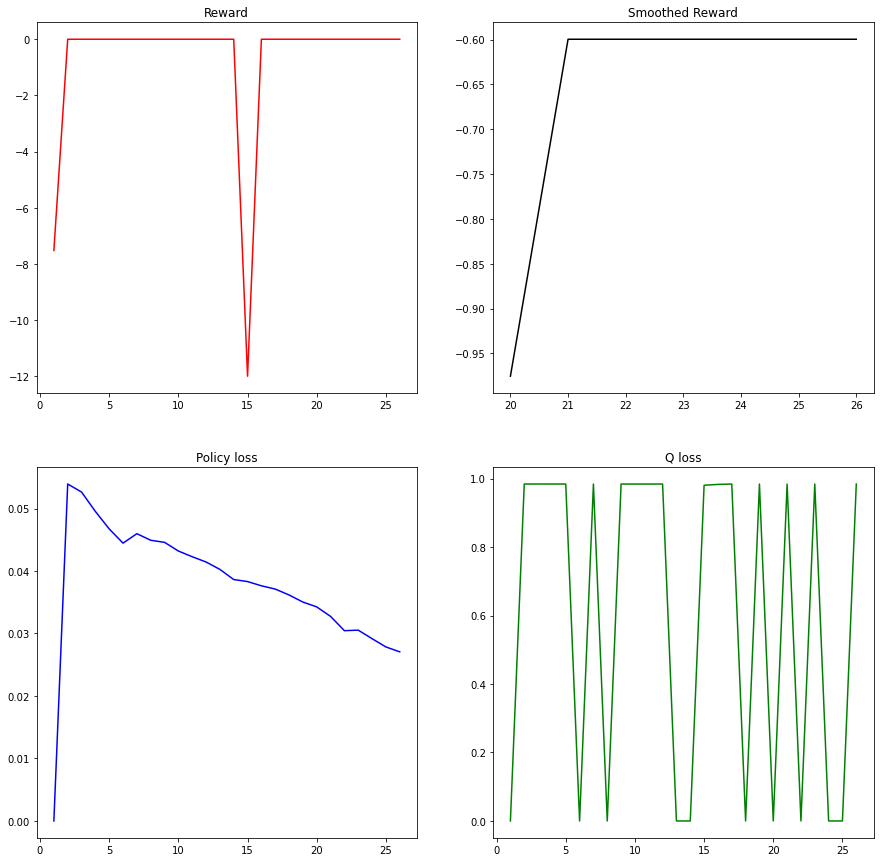

50: Done after 251 steps. Episode reward: 0 
 Value-loss 0.984175443649292, policy-loss 0.009348701685667038
Best reward 9.794590086965016 at episode 47


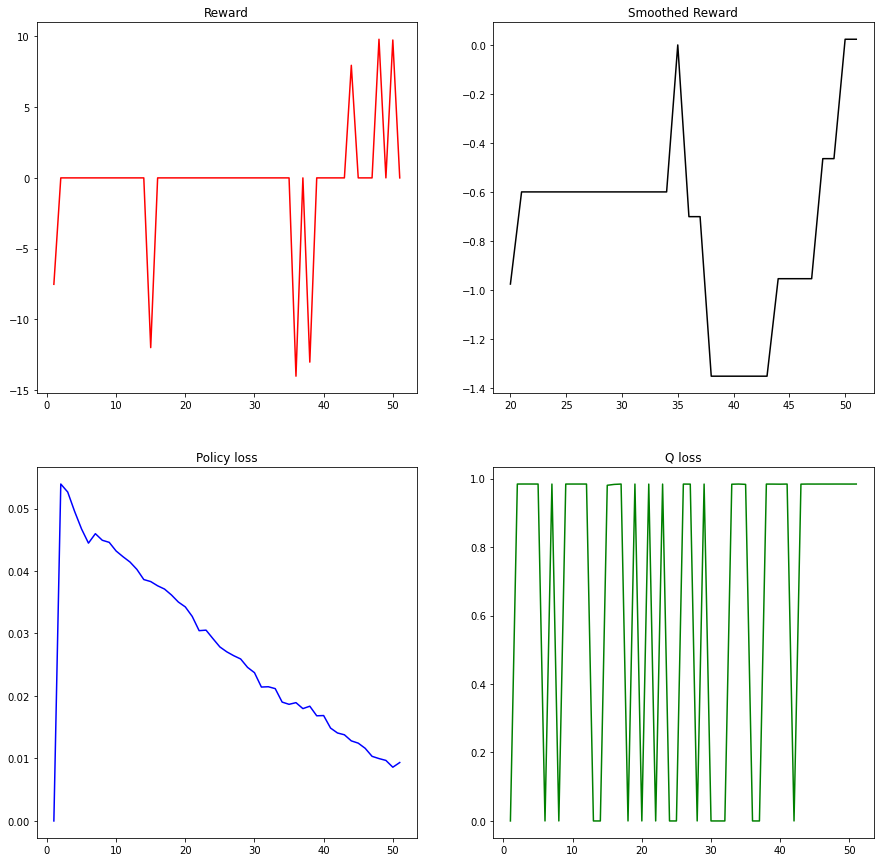

75: Done after 251 steps. Episode reward: -0.054571698944636565 
 Value-loss 0.9840764403343201, policy-loss -0.006341712549328804
Best reward 9.794590086965016 at episode 47


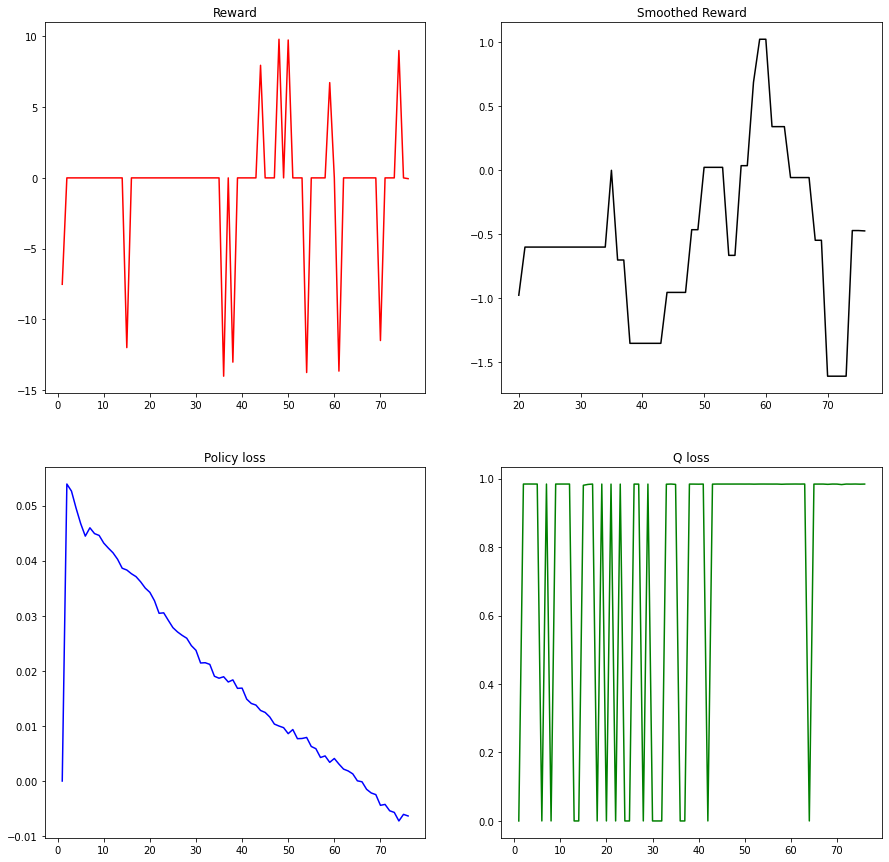

100: Done after 153 steps. Episode reward: -11.486376573664765 
 Value-loss 0.9842579364776611, policy-loss -0.015743233263492584
Best reward 10 at episode 87


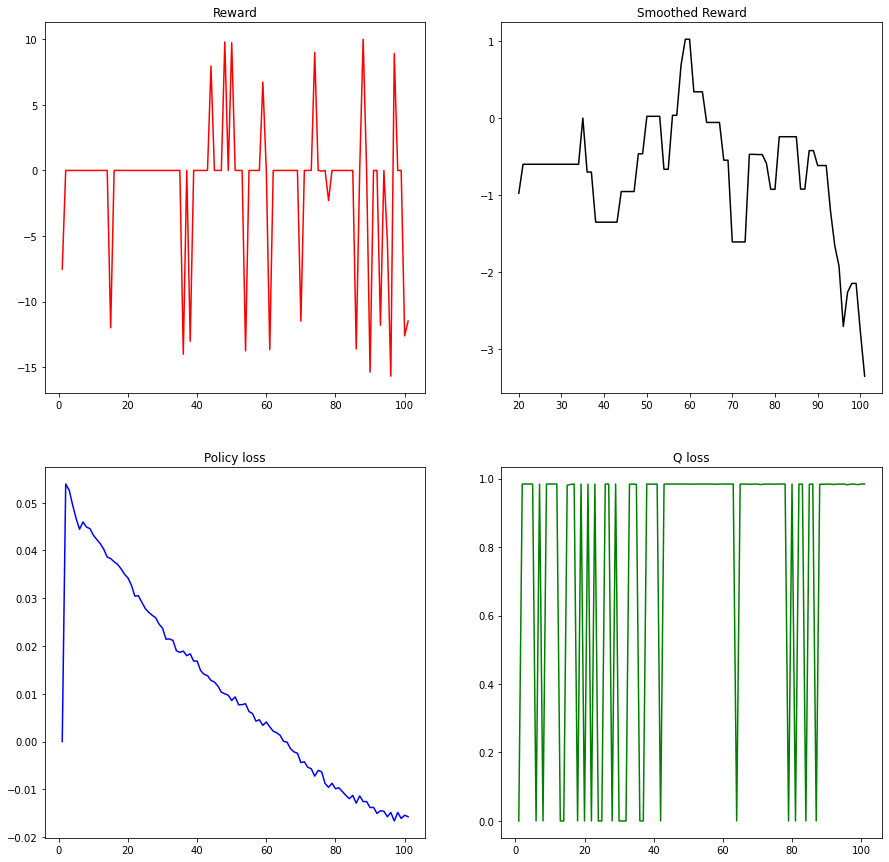

125: Done after 251 steps. Episode reward: -1.5918993811245858 
 Value-loss 0.9840594530105591, policy-loss -0.024158872663974762
Best reward 10 at episode 87


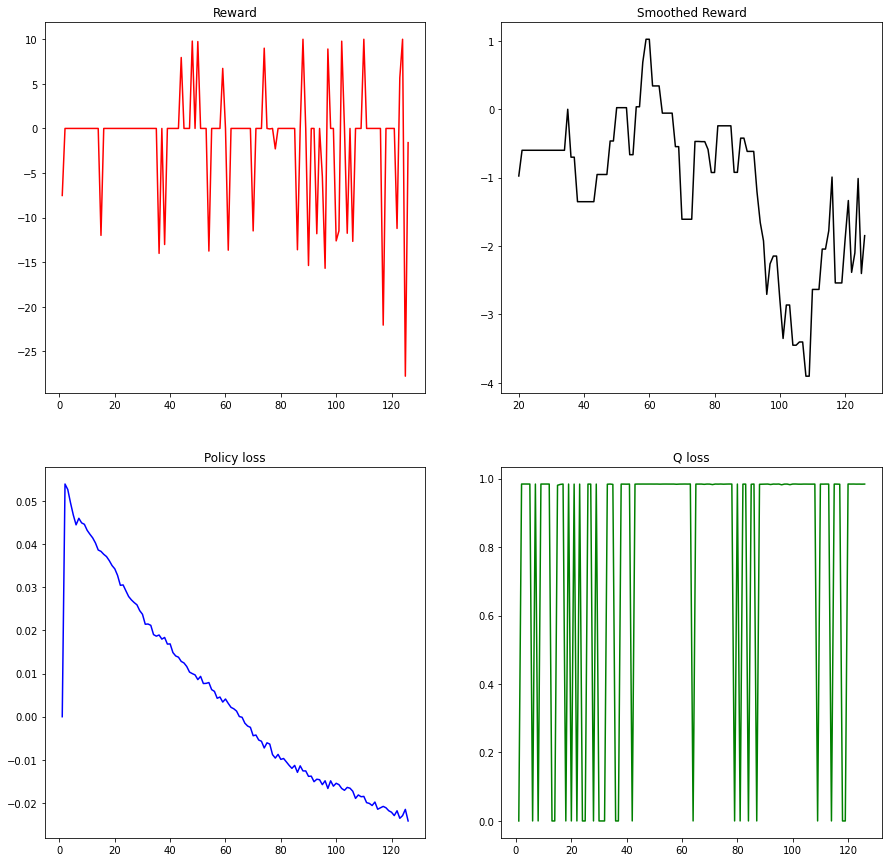

150: Done after 36 steps. Episode reward: -11.351085565535453 
 Value-loss 0.9842313528060913, policy-loss -0.026919269934296608
Best reward 10 at episode 87


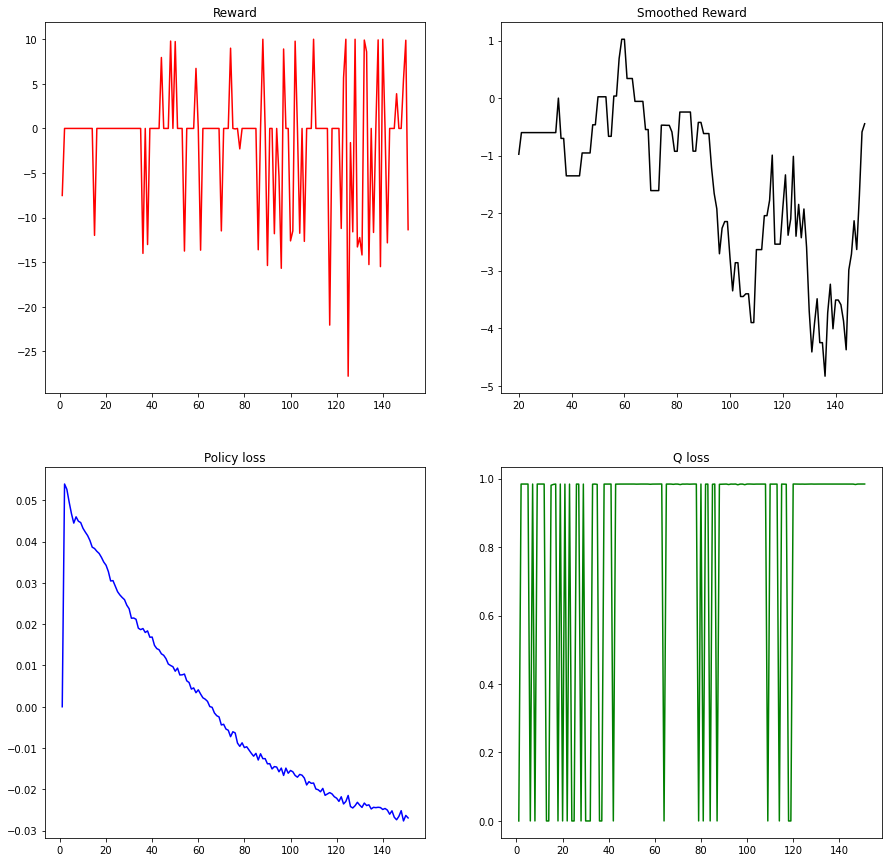

175: Done after 33 steps. Episode reward: 10 
 Value-loss 0.9841716289520264, policy-loss -0.030707772821187973
Best reward 10 at episode 87


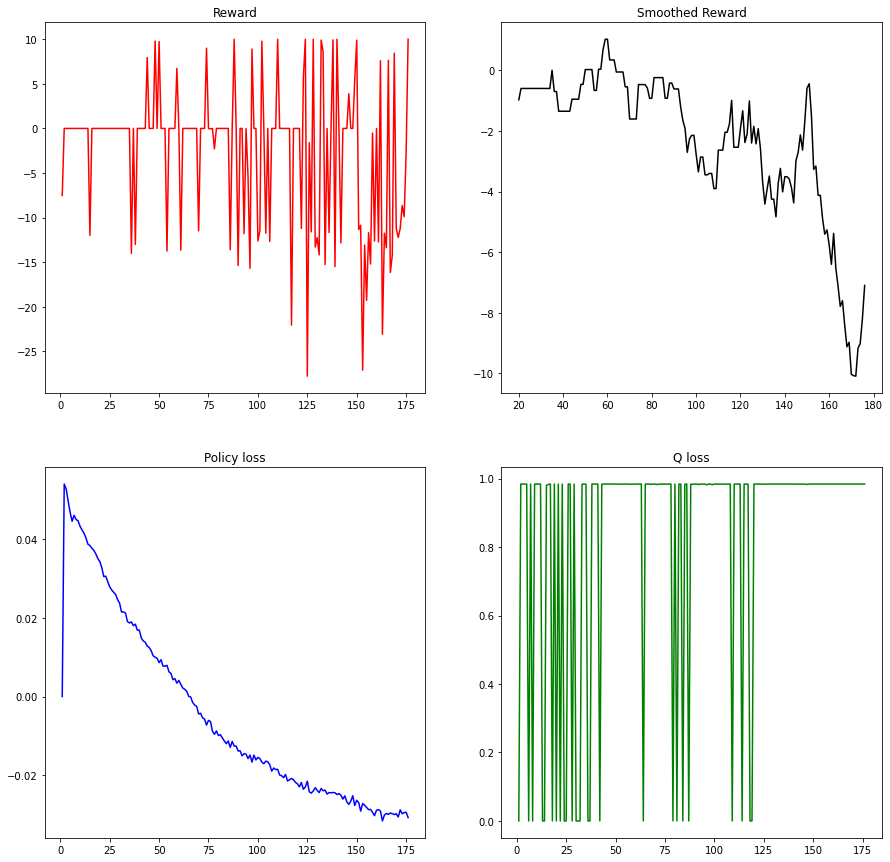

200: Done after 251 steps. Episode reward: 0 
 Value-loss 0.9841795563697815, policy-loss -0.031197374686598778
Best reward 10 at episode 87


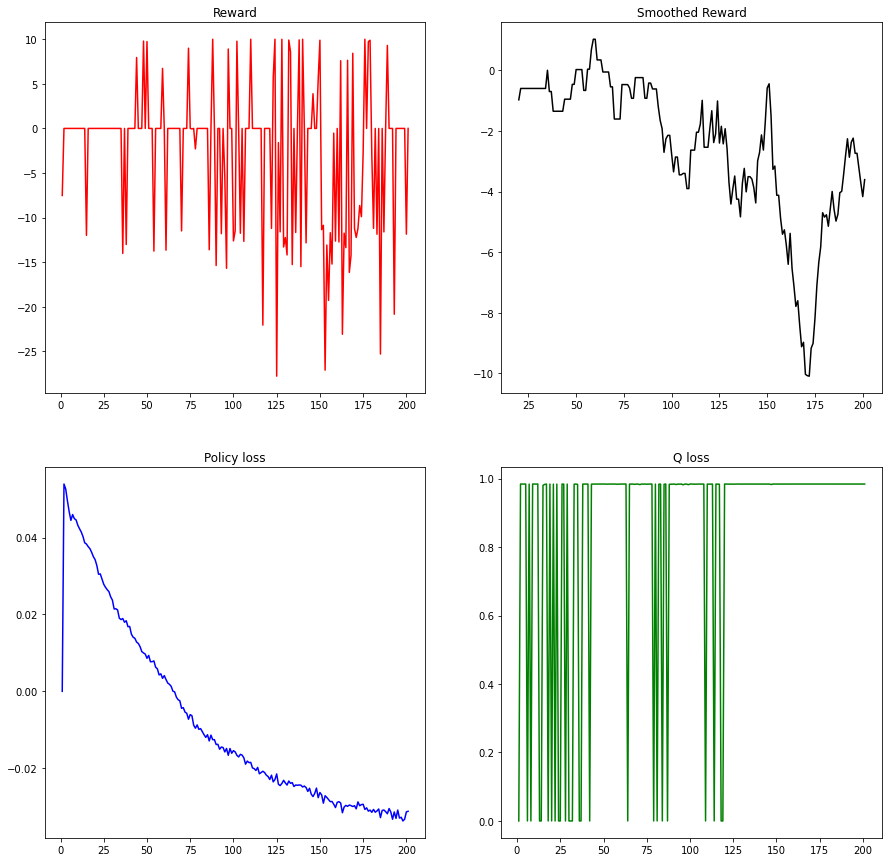

225: Done after 28 steps. Episode reward: 10 
 Value-loss 0.9842040538787842, policy-loss -0.033081233501434326
Best reward 10 at episode 87


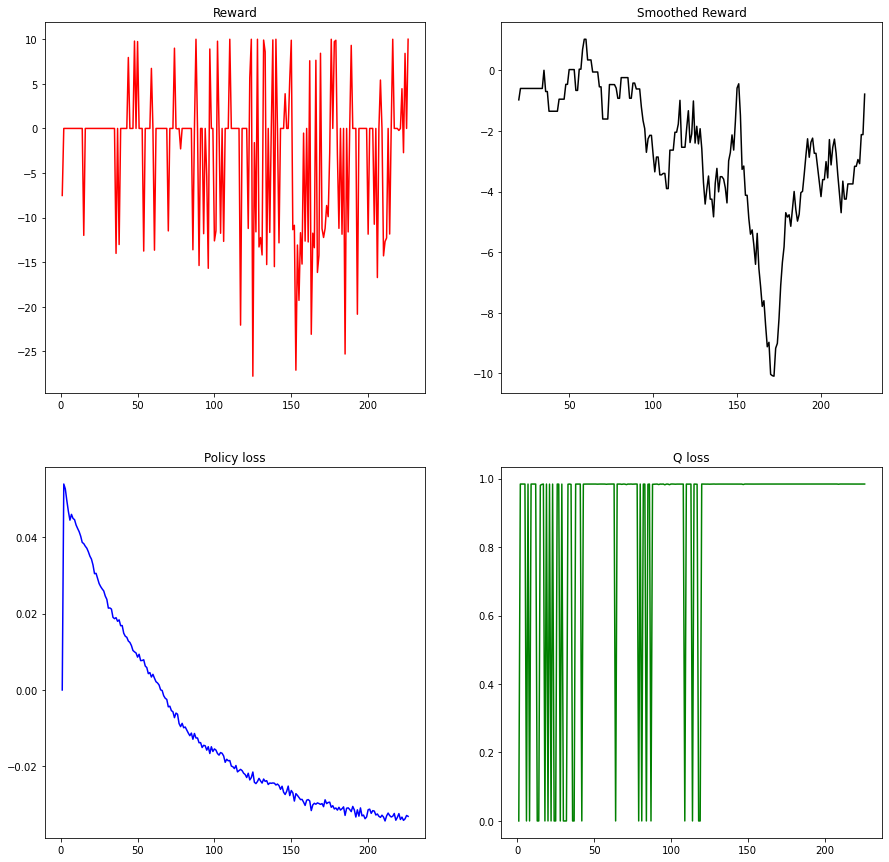

250: Done after 251 steps. Episode reward: 0 
 Value-loss 0.9842264652252197, policy-loss -0.03226279467344284
Best reward 10 at episode 87


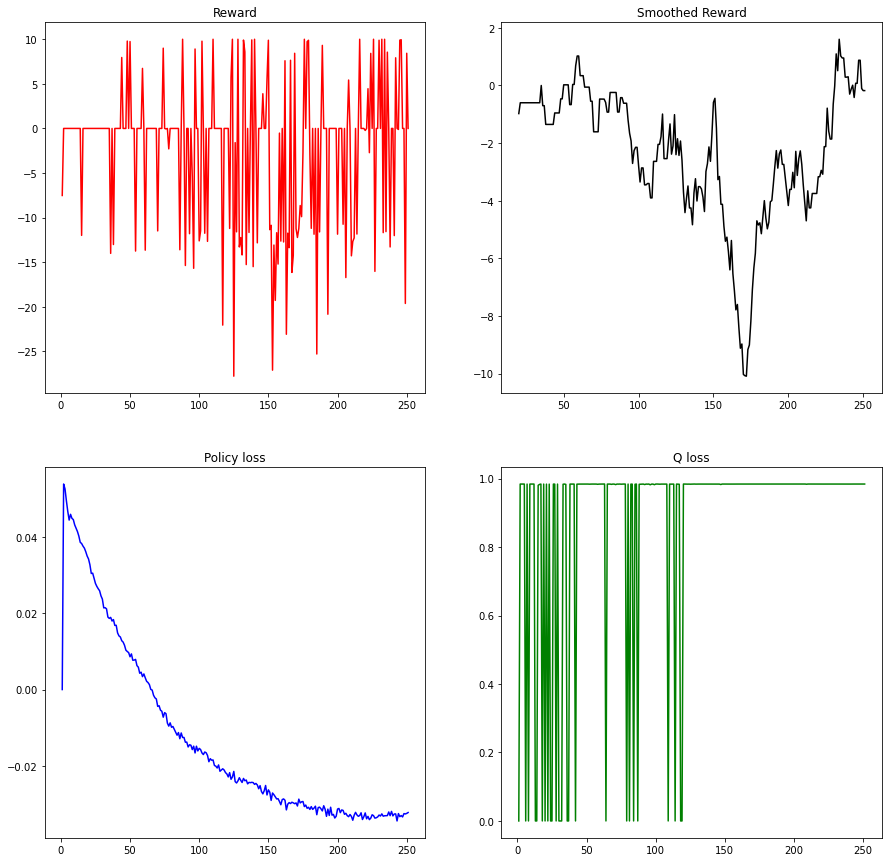

275: Done after 251 steps. Episode reward: 0 
 Value-loss 0.9841923117637634, policy-loss -0.03191424906253815
Best reward 10 at episode 87


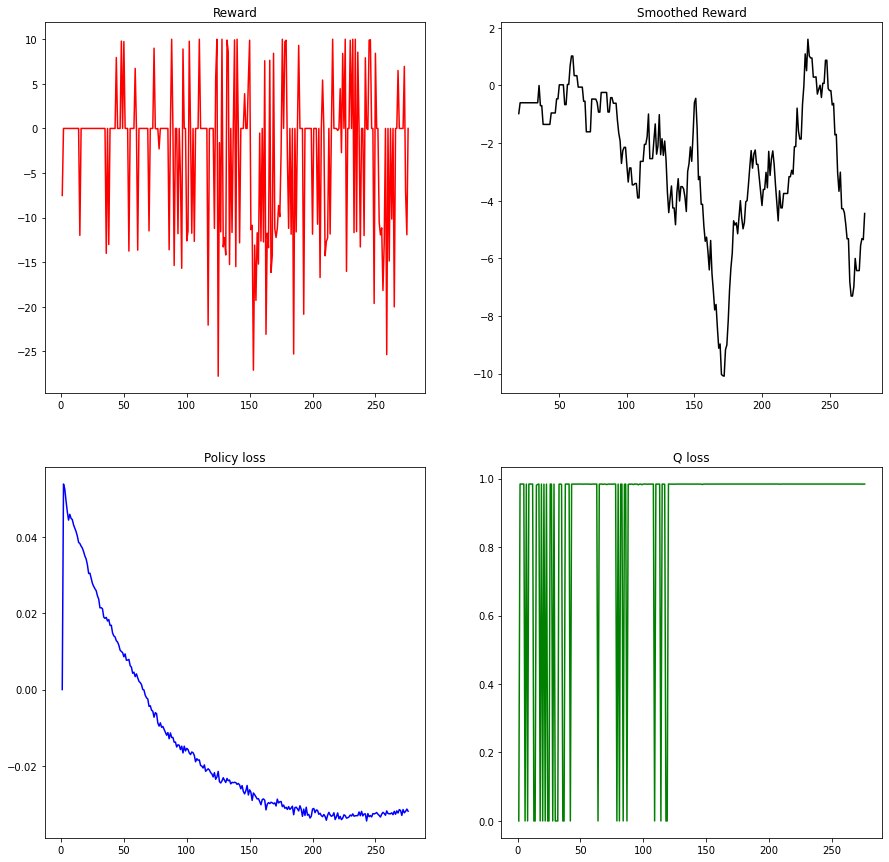

300: Done after 22 steps. Episode reward: -10.940676469706139 
 Value-loss 0.984177827835083, policy-loss -0.029755277559161186
Best reward 10 at episode 87


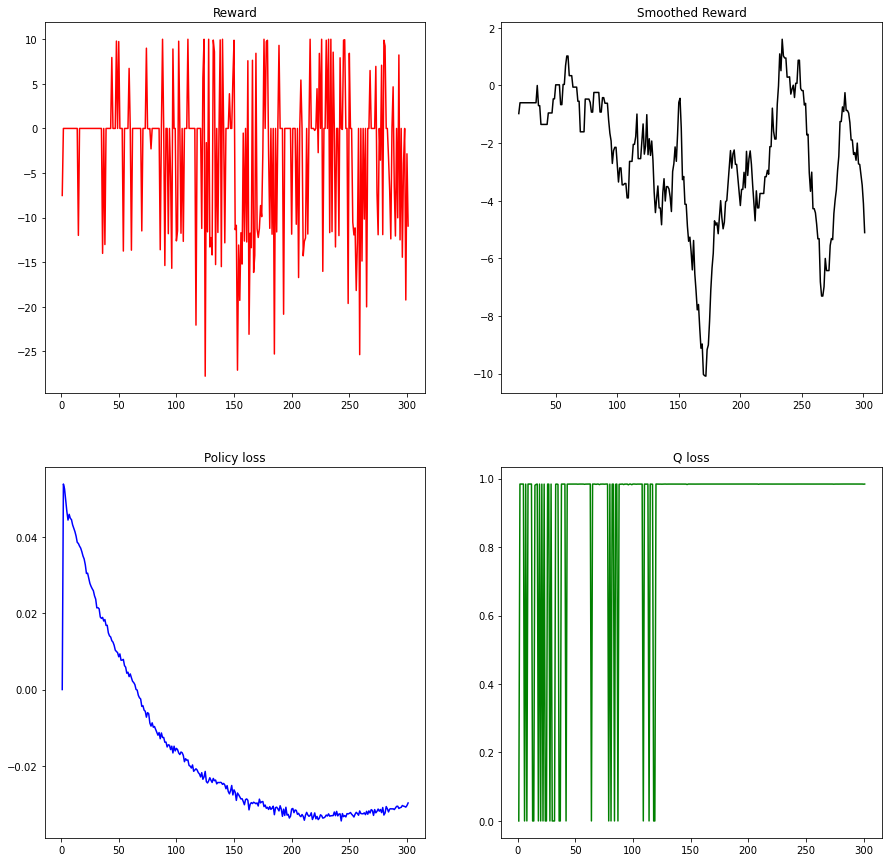

325: Done after 251 steps. Episode reward: 0 
 Value-loss 0.9842402935028076, policy-loss -0.027989018708467484
Best reward 10 at episode 87


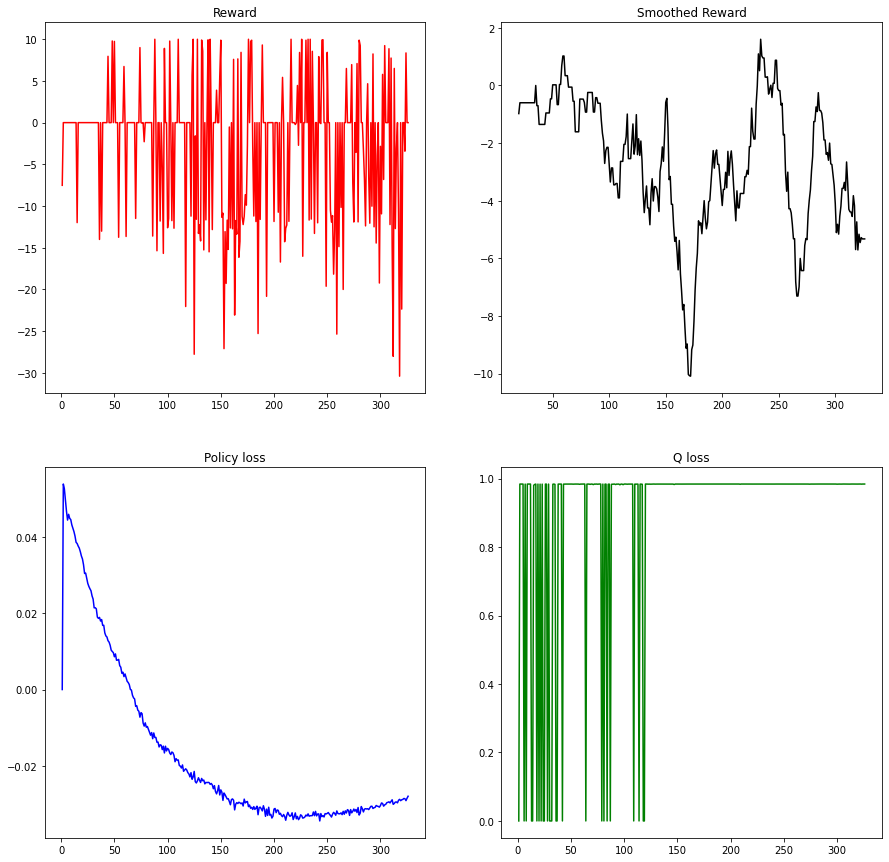

350: Done after 251 steps. Episode reward: 0 
 Value-loss 0.98423171043396, policy-loss -0.025647588074207306
Best reward 10 at episode 87


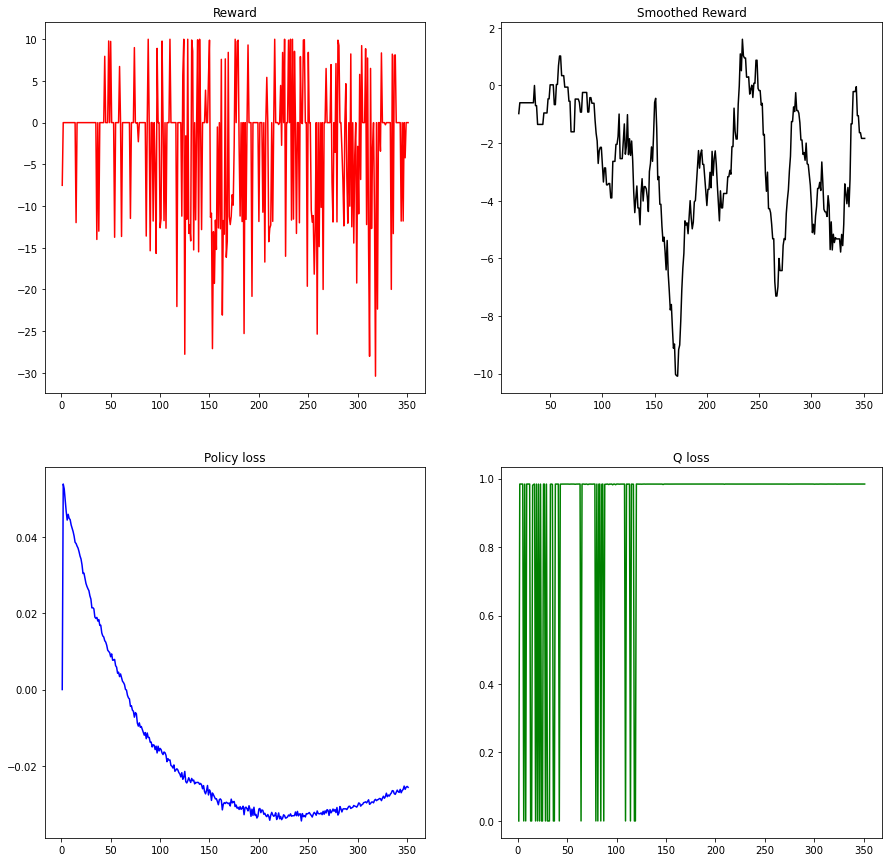

375: Done after 203 steps. Episode reward: -14.257291886268877 
 Value-loss 0.9842574000358582, policy-loss -0.02317557856440544
Best reward 10 at episode 87


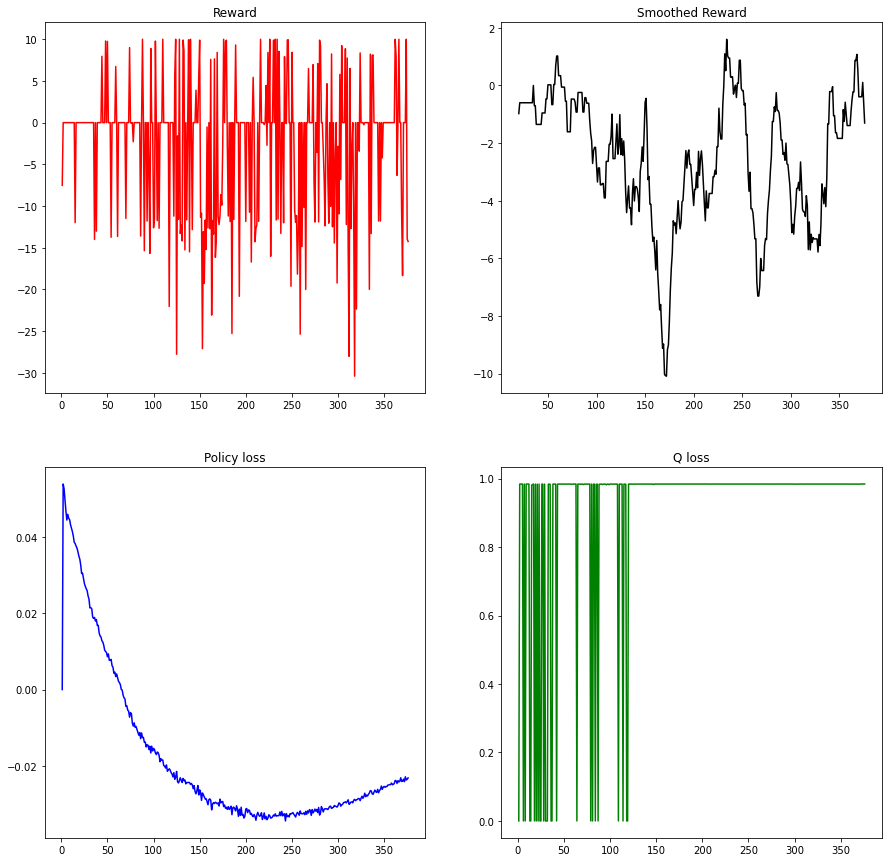

400: Done after 251 steps. Episode reward: 0 
 Value-loss 0.9841363430023193, policy-loss -0.02090771123766899
Best reward 10 at episode 87


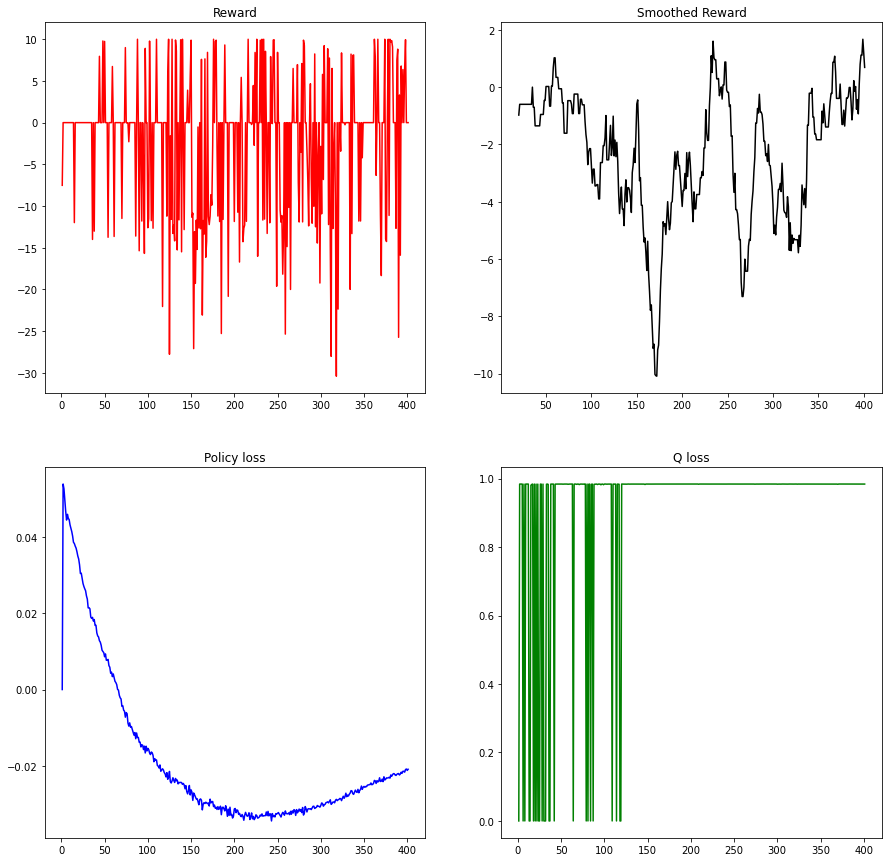

425: Done after 52 steps. Episode reward: 9.83640134550929 
 Value-loss 0.9841086864471436, policy-loss -0.018272843211889267
Best reward 10 at episode 87


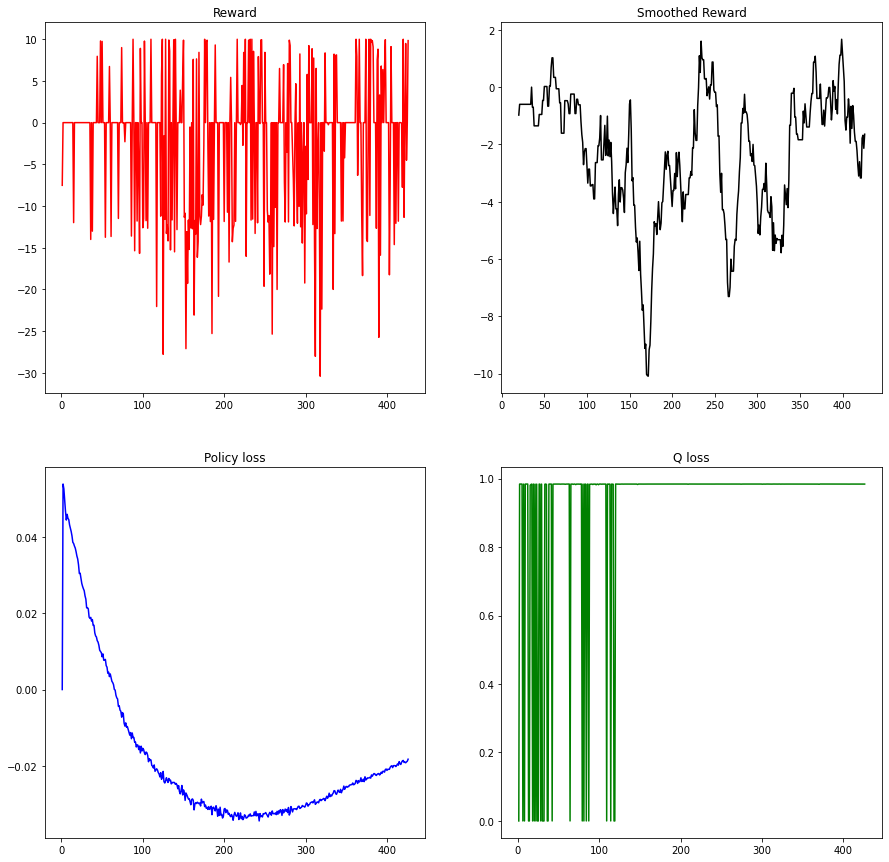

450: Done after 251 steps. Episode reward: 0 
 Value-loss 0.984279215335846, policy-loss -0.016172010451555252
Best reward 10 at episode 87


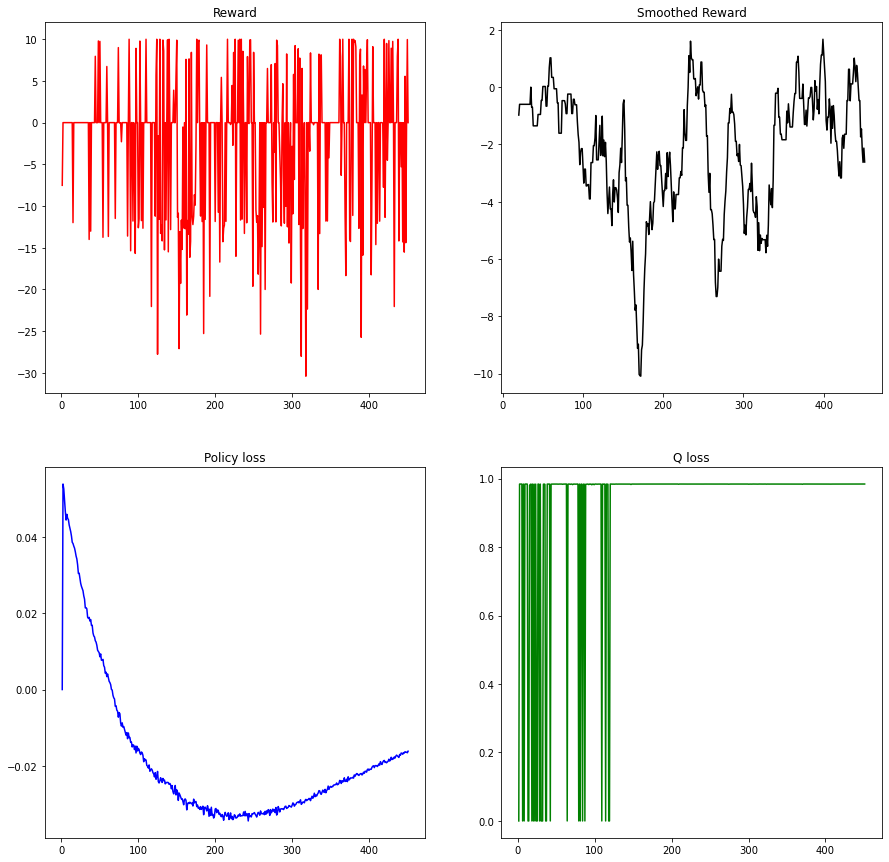

In [ ]:
%load_ext autoreload
%autoreload

plot_reward = []
plot_policy_loss = []
plot_value_loss = []
plot_smoothed_reward = []

replay_number = 5

max_episodes = 2000
max_steps = 300
fps = 50
show = False
stats = []
losses = []
random_explore_no = 300
total_steps = 0
current_fig = None
best_reward = -np.inf
best_episode = 0
model_dir = "saved_models"
#opponent = h_env.BasicOpponent()


for episode in range(max_episodes):
    episode_reward = 0
    ob = env.reset()
    
    obs_agent2 = env.obs_agent_two()
    value_loss = 0
    policy_loss = 0
    steps_per_episode = 0
    for ep_step in range(max_steps):
        a = None
        d = False
        if total_steps < random_explore_no:
            a = ddpg.random_action()

            ob_new, r, d, info = env.step(a)
            
        
            reward_closeness_to_puck = info['reward_closeness_to_puck']     #it's already included
            reward_puck_direction  = info['reward_puck_direction']
            reward_touch_puck = info['reward_touch_puck']
        
            r = r #+ 0.5 * reward_puck_direction + 0.5 * reward_touch_puck +  reward_closeness_to_puck
         
            #ob_new = np.squeeze(np.transpose(ob_new))  # TODO due to a bad env we need the transpose here
            #ddpg.store_transition([ob, a, r, ob_new, d])
            if d:
                ddpg.store_transition(ob, None, r, ob_new, d)
            else:
                ddpg.store_transition(ob, a, r, ob_new, d)
                
            episode_reward += r
        else:
            a = ddpg.select_action(ob)

            ob_new, r, d, info = env.step(a)
            
            #ob_new = np.squeeze(np.transpose(ob_new))  # TODO due to a bad env we need the transpose here
            if d:
                ddpg.store_transition(ob, None, r, ob_new, d)
            else:
                ddpg.store_transition(ob, a, r, ob_new, d)
            episode_reward += r

            #if len(ddpg.buffer.memory) > 3:
                #for _ in range(replay_number):
            value_loss, policy_loss = ddpg.update_policy()

        ob = ob_new
        steps_per_episode = ep_step
        if show:
            time.sleep(1.0 / fps)
            env.render(mode='human')
        if d: break
        total_steps += 1

    losses.append([value_loss, policy_loss])
    stats.append([episode, episode_reward, steps_per_episode + 1])

    try:
        plot_reward.append([episode_reward, episode + 1])
        plot_policy_loss.append([policy_loss, episode + 1])
        plot_value_loss.append([value_loss, episode + 1])
        smoothed_rewards = running_mean(np.asarray(stats)[:, 1], 20).tolist()
        if smoothed_rewards:
            plot_smoothed_reward.append([smoothed_rewards[-1], episode + 1])
        #
    except:
        continue

    if episode_reward > best_reward:
        model_save_path = model_dir + "/" + env_name
        Path(model_save_path).mkdir(parents=True, exist_ok=True)
        ddpg.save_model(model_save_path)
        best_reward = episode_reward
        best_episode = episode

    if ((episode > 0) and (episode % 25 == 0)):
        print("{}: Done after {} steps. Episode reward: {} \n Value-loss {}, policy-loss {}".format(episode,
                                                                                                    steps_per_episode + 1,
                                                                                                    episode_reward,
                                                                                                    value_loss,
                                                                                                    policy_loss))
        print("Best reward {} at episode {}".format(best_reward, best_episode))
        # print(np.mean(losses, 0)[0], np.mean(losses, 0)[1])
        current_fig = subplot(current_fig, plot_reward, plot_smoothed_reward, plot_policy_loss, plot_value_loss)

In [217]:
%debug

> /home/kathi/Dokumente/sebs_code/ReIn_Course/project/laser-hockey-env-master/DDPG/actorCritic.py(63)forward()
     61 
     62             out = self.l1_relu(out)
---> 63             intermediate = torch.cat([out, actions], dim=1)
     64             out = self.l2(intermediate)
     65             out = self.l2_relu(out)

ipdb> out
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0506, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.1893, 0.0155,  ..., 1.0348, 0.0000, 0.0543]],

        ...,

        [[0.0939, 0.0000, 0.1637,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.1626,  ..., 0.0762, 0.0000, 0.0000]]],
       device='cuda:0', grad_fn=<ReluBackward0>)
ipdb> out.shape
torch.Size([64, 1, 256])
ipdb> actions.shape
torch.Size([64, 1, 8])
ipdb> q


In [289]:
obs =env.reset()
opponent = h_env.BasicOpponent()
env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(300):
    time.sleep(0.2)
    env.render()
    a1 = ddpg.select_action(obs)
    a1 = a1[:4]
    print(a1)
    a2 = opponent.act(obs_agent2)
    #print(a2)
    obs, r, d, info = env.step(np.hstack([a1, a2]))    
    if d: break

[ 0.96964914  1.         -1.         -0.7821689 ]
[ 0.9753328   1.         -1.         -0.78475803]
[ 0.9683839  1.        -1.        -0.7913047]
[ 0.96760935  1.         -1.         -0.8076442 ]
[ 0.9656451  1.        -1.        -0.796868 ]
[ 0.9580688  1.        -1.        -0.8120839]
[ 0.95231825  1.         -1.         -0.79587454]
[ 0.94409335  1.         -1.         -0.77549434]
[ 0.9558409   1.         -0.14431132  0.69363034]
[ 0.96090204  1.         -0.7264689   1.        ]
[ 0.9537947  1.        -1.         1.       ]
[ 0.95819175  1.         -0.5628808   1.        ]
[ 0.95073247  1.         -1.          1.        ]
[ 0.95261586  1.         -1.          1.        ]
[0.9551339  1.         0.22328527 1.        ]
[0.9586978 1.        0.5699228 1.       ]
[0.956815  1.        0.6762549 1.       ]
[0.9706165  1.         0.67112386 1.        ]
[ 0.97841704  1.         -1.          1.        ]
[ 0.9695125  1.        -1.         1.       ]
[ 0.97100484  1.         -1.         -0.7117

In [290]:
env.close()